# Keras Regression

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('resources/TensorFlow_FILES/DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Exploratory Data Analysis

In [5]:
#check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


F:\anaconda_app\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

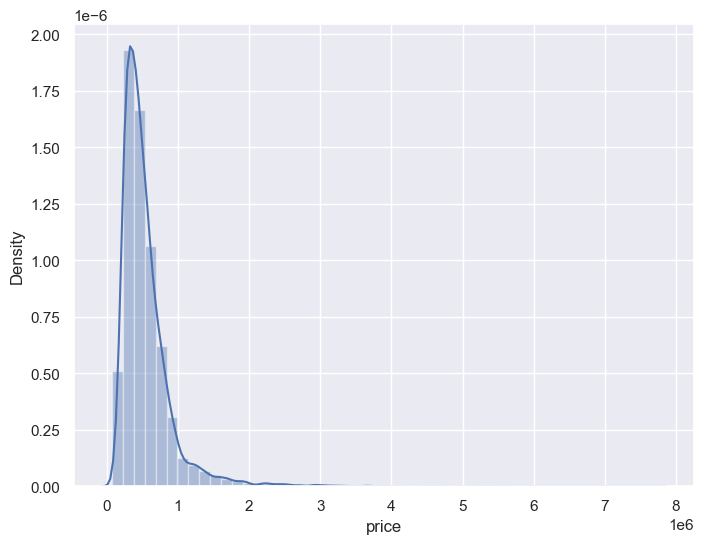

In [7]:
#check for distribution of price
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

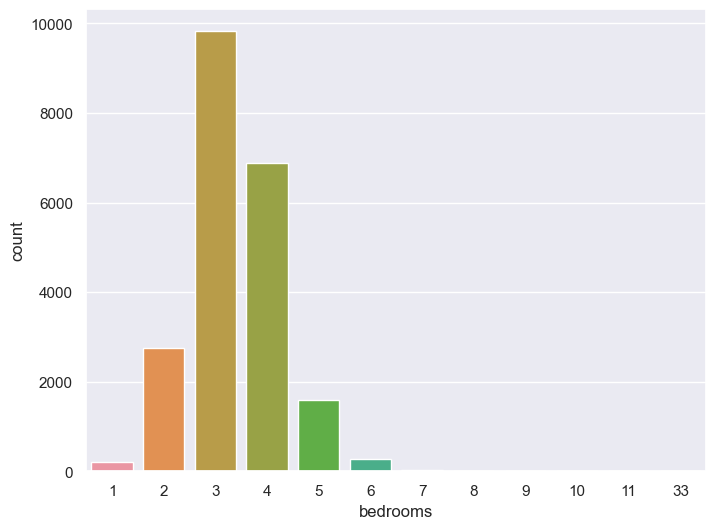

In [8]:
#check count plot for bedrooms

sns.countplot(x='bedrooms', data=df)

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

price and sqft_living are highly positively correlated and we can check that through scatter plot as well.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

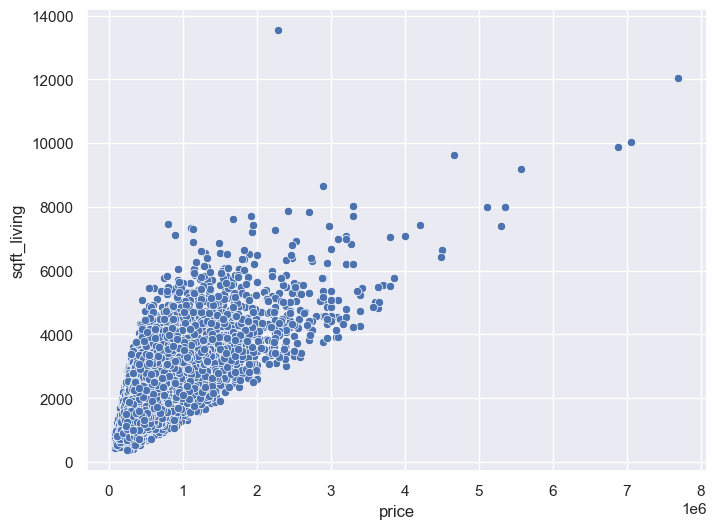

In [10]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

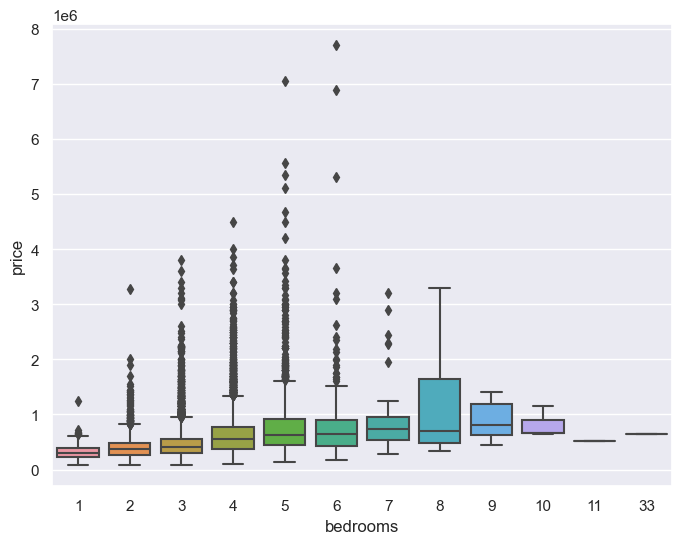

In [11]:
#distribution of price vs bedroom 
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

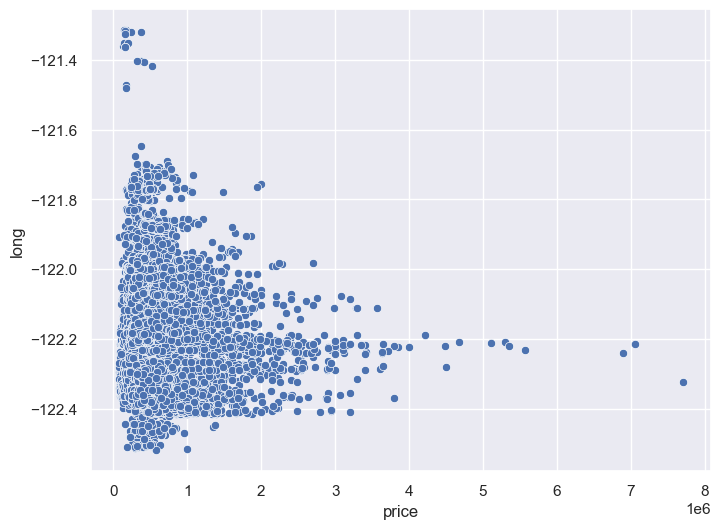

In [12]:
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

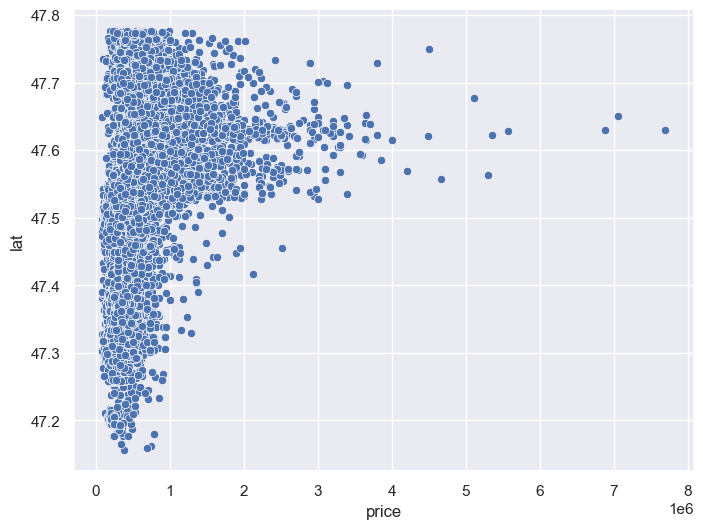

In [13]:
sns.scatterplot(x='price',y='lat',data=df)

It looks like there are some expensive houses around (47.6,-122.2) area according to the Lat Long scatter plot.

<AxesSubplot:xlabel='long', ylabel='lat'>

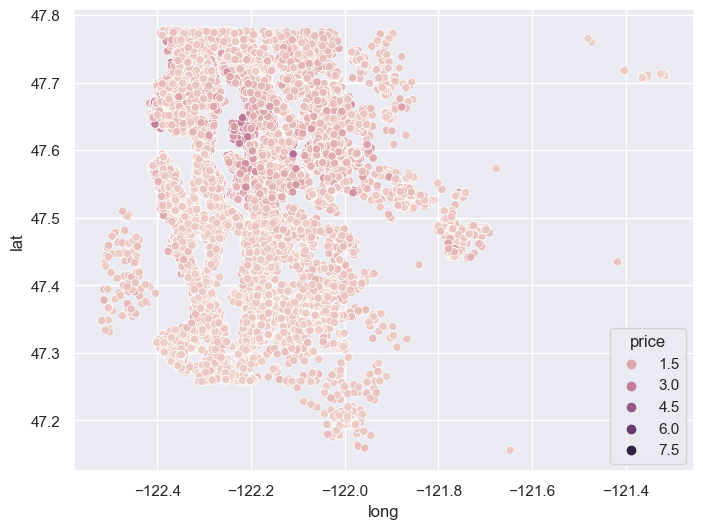

In [14]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### Removing some of the outliers

In [15]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Removing the top 1% prices

In [16]:
len(df)*0.01

215.97

In [17]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

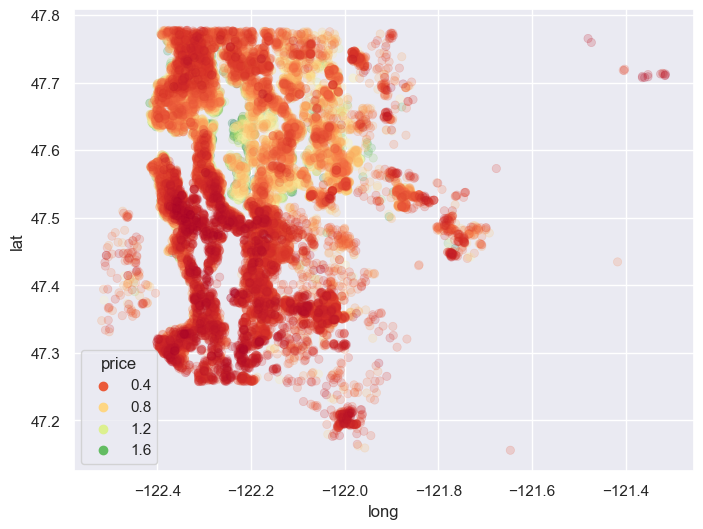

In [18]:
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

Here it looks like house around water are more expensive and we can check through box plot as well

<AxesSubplot:xlabel='waterfront', ylabel='price'>

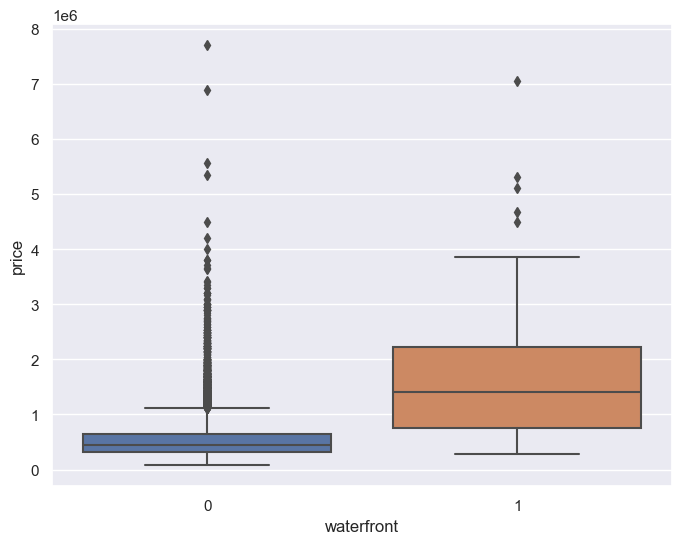

In [19]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can drop the id column

In [21]:
df = df.drop('id', axis=1)

### Feature Engineering from Date

In [22]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

Convert date into date time 

In [23]:
df['date'] = pd.to_datetime(df['date'])

Extract month and year

In [24]:
df['month'] = df['date'].apply(lambda date:date.month)

In [25]:
df['year'] = df['date'].apply(lambda date:date.year)

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='month'>

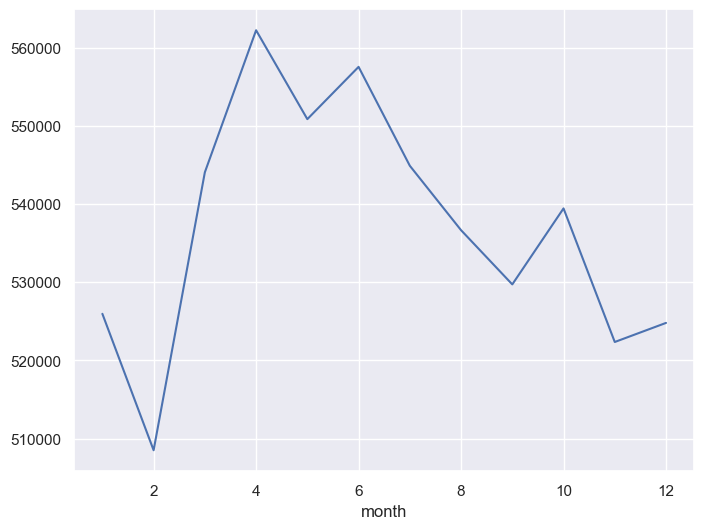

In [27]:
df.groupby('month')['price'].mean().plot()

it looks like average price on April was the highest

<AxesSubplot:xlabel='year'>

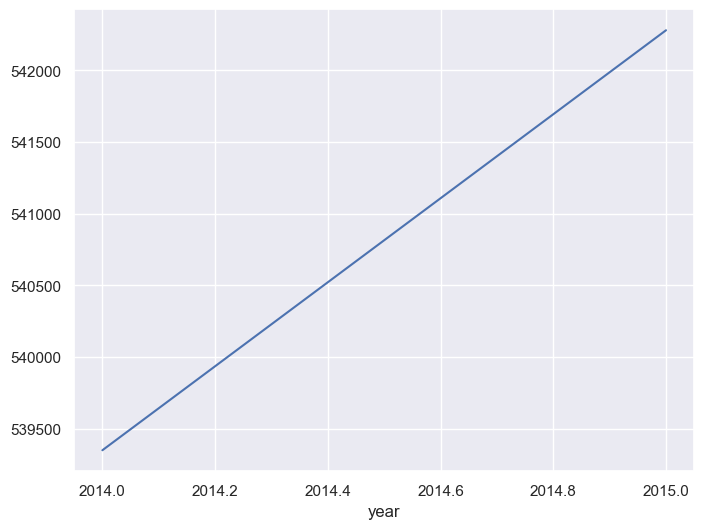

In [28]:
df.groupby('year')['price'].mean().plot()

This shows as time goes by the prices go higher which is a natural inflation

In [29]:
# we can drop date column since we extracted the year and month and we no longer need it
df = df.drop('date',axis=1)

In [30]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

There are 70 unique zipcodes and getting dummy variables on them is just too much, so we can just drop them.

In [31]:
df = df.drop('zipcode',axis=1)

In [32]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

## Scaling and Train Test Split

In [33]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train= scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

## Creating a Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [41]:
X_train.shape

(15117, 19)

In [42]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# Final output node for prediction
# Dense(1) since we are only going to predict one thing(price)
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [43]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 430244298752.0000 - val_loss: 418931441664.0000
Epoch 2/400
119/119 [==============================] - 0s 865us/step - loss: 429142474752.0000 - val_loss: 414935678976.0000
Epoch 3/400
119/119 [==============================] - 0s 873us/step - loss: 412481880064.0000 - val_loss: 376562876416.0000
Epoch 4/400
119/119 [==============================] - 0s 865us/step - loss: 330395713536.0000 - val_loss: 245390999552.0000
Epoch 5/400
119/119 [==============================] - 0s 865us/step - loss: 175529656320.0000 - val_loss: 110780637184.0000
Epoch 6/400
119/119 [==============================] - 0s 873us/step - loss: 103189413888.0000 - val_loss: 95628165120.0000
Epoch 7/400
119/119 [==============================] - 0s 865us/step - loss: 98005819392.0000 - val_loss: 94043267072.0000
Epoch 8/400
119/119 [==============================] - 0s 865us/step - loss: 96257875968.0000 - val_loss: 92336316416.0000
Epoch 9

119/119 [==============================] - 0s 873us/step - loss: 37520269312.0000 - val_loss: 36193579008.0000
Epoch 68/400
119/119 [==============================] - 0s 856us/step - loss: 37325438976.0000 - val_loss: 35985694720.0000
Epoch 69/400
119/119 [==============================] - 0s 873us/step - loss: 37126631424.0000 - val_loss: 35823067136.0000
Epoch 70/400
119/119 [==============================] - 0s 865us/step - loss: 36946198528.0000 - val_loss: 35618967552.0000
Epoch 71/400
119/119 [==============================] - 0s 865us/step - loss: 36831055872.0000 - val_loss: 35448885248.0000
Epoch 72/400
119/119 [==============================] - 0s 882us/step - loss: 36632166400.0000 - val_loss: 35281379328.0000
Epoch 73/400
119/119 [==============================] - 0s 865us/step - loss: 36502097920.0000 - val_loss: 35308232704.0000
Epoch 74/400
119/119 [==============================] - 0s 865us/step - loss: 36392251392.0000 - val_loss: 34961383424.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 873us/step - loss: 32657991680.0000 - val_loss: 31109038080.0000
Epoch 134/400
119/119 [==============================] - 0s 856us/step - loss: 32587636736.0000 - val_loss: 31122128896.0000
Epoch 135/400
119/119 [==============================] - 0s 873us/step - loss: 32567572480.0000 - val_loss: 31065042944.0000
Epoch 136/400
119/119 [==============================] - 0s 882us/step - loss: 32539609088.0000 - val_loss: 31017390080.0000
Epoch 137/400
119/119 [==============================] - 0s 873us/step - loss: 32481275904.0000 - val_loss: 30992633856.0000
Epoch 138/400
119/119 [==============================] - 0s 865us/step - loss: 32491012096.0000 - val_loss: 30957807616.0000
Epoch 139/400
119/119 [==============================] - 0s 865us/step - loss: 32516411392.0000 - val_loss: 30926727168.0000
Epoch 140/400
119/119 [==============================] - 0s 865us/step - loss: 32433307648.0000 - val_loss: 30859065344.0000


119/119 [==============================] - 0s 865us/step - loss: 31204438016.0000 - val_loss: 29439842304.0000
Epoch 199/400
119/119 [==============================] - 0s 882us/step - loss: 31222986752.0000 - val_loss: 29455685632.0000
Epoch 200/400
119/119 [==============================] - 0s 873us/step - loss: 31211331584.0000 - val_loss: 29386002432.0000
Epoch 201/400
119/119 [==============================] - 0s 873us/step - loss: 31233929216.0000 - val_loss: 29377294336.0000
Epoch 202/400
119/119 [==============================] - 0s 882us/step - loss: 31161137152.0000 - val_loss: 29370546176.0000
Epoch 203/400
119/119 [==============================] - 0s 865us/step - loss: 31174498304.0000 - val_loss: 29410064384.0000
Epoch 204/400
119/119 [==============================] - 0s 865us/step - loss: 31144214528.0000 - val_loss: 29354629120.0000
Epoch 205/400
119/119 [==============================] - 0s 865us/step - loss: 31116630016.0000 - val_loss: 29366710272.0000
Epoch 206/400


119/119 [==============================] - 0s 865us/step - loss: 30444945408.0000 - val_loss: 28542504960.0000
Epoch 264/400
119/119 [==============================] - 0s 873us/step - loss: 30469695488.0000 - val_loss: 28618952704.0000
Epoch 265/400
119/119 [==============================] - 0s 865us/step - loss: 30463805440.0000 - val_loss: 28570892288.0000
Epoch 266/400
119/119 [==============================] - 0s 882us/step - loss: 30438295552.0000 - val_loss: 28485746688.0000
Epoch 267/400
119/119 [==============================] - 0s 873us/step - loss: 30412480512.0000 - val_loss: 28435349504.0000
Epoch 268/400
119/119 [==============================] - 0s 865us/step - loss: 30431334400.0000 - val_loss: 28464451584.0000
Epoch 269/400
119/119 [==============================] - 0s 882us/step - loss: 30382190592.0000 - val_loss: 28413880320.0000
Epoch 270/400
119/119 [==============================] - 0s 873us/step - loss: 30385928192.0000 - val_loss: 28504551424.0000
Epoch 271/400


119/119 [==============================] - 0s 856us/step - loss: 29740623872.0000 - val_loss: 27667357696.0000
Epoch 329/400
119/119 [==============================] - 0s 856us/step - loss: 29709180928.0000 - val_loss: 27704041472.0000
Epoch 330/400
119/119 [==============================] - 0s 865us/step - loss: 29703962624.0000 - val_loss: 27731972096.0000
Epoch 331/400
119/119 [==============================] - 0s 856us/step - loss: 29714061312.0000 - val_loss: 27655034880.0000
Epoch 332/400
119/119 [==============================] - 0s 865us/step - loss: 29748770816.0000 - val_loss: 27587913728.0000
Epoch 333/400
119/119 [==============================] - 0s 882us/step - loss: 29687844864.0000 - val_loss: 27607791616.0000
Epoch 334/400
119/119 [==============================] - 0s 865us/step - loss: 29665433600.0000 - val_loss: 27594356736.0000
Epoch 335/400
119/119 [==============================] - 0s 865us/step - loss: 29648091136.0000 - val_loss: 27562926080.0000
Epoch 336/400


119/119 [==============================] - 0s 872us/step - loss: 29061777408.0000 - val_loss: 26993385472.0000
Epoch 394/400
119/119 [==============================] - 0s 873us/step - loss: 29051207680.0000 - val_loss: 26912366592.0000
Epoch 395/400
119/119 [==============================] - 0s 864us/step - loss: 29023768576.0000 - val_loss: 26787442688.0000
Epoch 396/400
119/119 [==============================] - 0s 864us/step - loss: 29017038848.0000 - val_loss: 26848729088.0000
Epoch 397/400
119/119 [==============================] - 0s 855us/step - loss: 28985171968.0000 - val_loss: 26832629760.0000
Epoch 398/400
119/119 [==============================] - 0s 865us/step - loss: 29002582016.0000 - val_loss: 27098327040.0000
Epoch 399/400
119/119 [==============================] - 0s 882us/step - loss: 28953634816.0000 - val_loss: 26745466880.0000
Epoch 400/400
119/119 [==============================] - 0s 865us/step - loss: 29018191872.0000 - val_loss: 26747357184.0000


In [44]:
# Explor how model history looks like
losses =pd.DataFrame(model.history.history)

<AxesSubplot:>

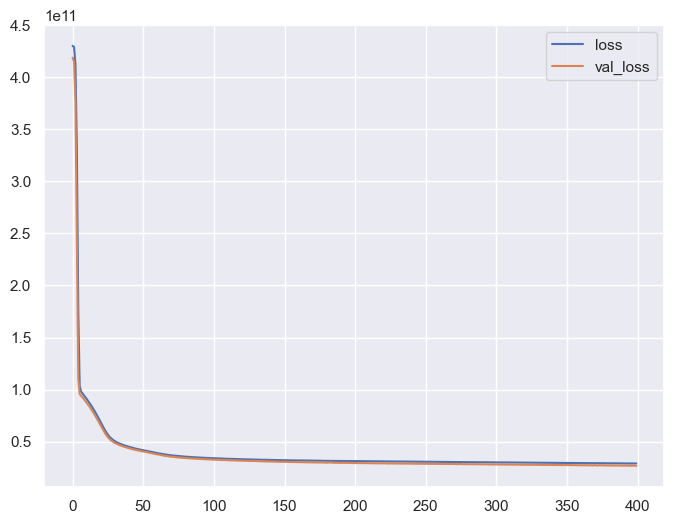

In [45]:
losses.plot()

# Evaluation on Test Data


In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [47]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 436us/step


In [48]:
#MAE
mean_absolute_error(y_test,predictions)

101122.48719859181

In [51]:
# root mean squared error
np.sqrt(mean_squared_error(y_test,predictions))

163546.18114758594

In [50]:
explained_variance_score(y_test,predictions)

0.7983321125646045

In [52]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [53]:
5.402966e+05

540296.6

In [54]:
101122.48 / 540296.6

0.18716105191111698

By dividing the average price by MAE we can see our model is off by around 20%

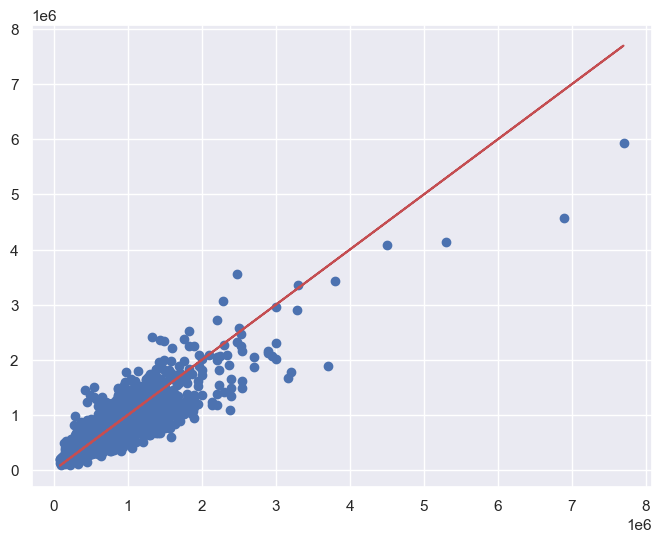

In [55]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

#### Predicting on Brand New Data

In [56]:
single_house = df.drop('price',axis=1).iloc[0]

In [67]:
X_test.shape

(6480, 19)

In [57]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [68]:
model.predict(single_house)

1/1 [==============================] - 0s 14ms/step


array([[284477.03]], dtype=float32)

In [69]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
